In [1]:
import numpy as np
import matplotlib.pyplot as plt
import process_data
import plot_functions

In [2]:
from compare_clusterings import *
from plot_functions import *
from process_data import *

In [4]:
df_filename_csv = "scores_cakmak_df_n30"

In [5]:
make_movies = False

In [92]:
comet_runs = True
st_runs = True

In [6]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

In [7]:
def create_heatmaps_for_dists(dd,distd,title="new heatmap"):
    import seaborn as sns
    import numpy as np
    import matplotlib.pyplot as plt
    from matplotlib.patches import Rectangle
    import diptest

    # Simulate example data for dd: A 3D numpy array
    #np.random.seed()  # For reproducibility
    #dd = np.random.uniform(0, 1, (5, 5, 100))  # Shape (5, 5, 100), like 5x5 distance matrices over 100 layers

    # Transpose the array to (1, 2, 0) ordering
    transposed_array = np.transpose(dd, (1, 2, 0))

    # Compute global statistics
    global_min_x = np.min(transposed_array)
    global_max_x = np.max(transposed_array)
    global_min_mean = np.min(np.mean(transposed_array, axis=2))
    global_max_mean = np.max(np.mean(transposed_array, axis=2))

    # Compute mean values for color scaling
    mean_values = np.mean(transposed_array, axis=2)

    # Create a grid of subplots
    fig, axes = plt.subplots(transposed_array.shape[0], transposed_array.shape[0], figsize=(20, 20))

    for row in range(transposed_array.shape[0]):
        for col in range(transposed_array.shape[0]):
            ax = axes[row, col]
            
            # Extract the values for the (row, col) position across all distance matrices
            cell_values = transposed_array[row, col, :]  # All values for the current cell
            
            # Remove x and y labels and ticks
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_ylabel('')  # Ensure no y-label

            # Add a background color using Rectangle based on mean values
            color = plt.cm.coolwarm((mean_values[row, col] - global_min_mean) / (global_max_mean - global_min_mean))
            rect = Rectangle((0, 0), 1, 1, color=color, transform=ax.transAxes, zorder=1)
            ax.add_patch(rect)

            # KDE plot to show the distribution
            sns.kdeplot(cell_values, ax=ax, color='skyblue', linewidth=3.5)

            # Compute the dip test for unimodality
            dip_statistic, p_value = diptest.diptest(cell_values)

            # Display the p-value in the center of the cell
            ax.text(0.5, 0.5, f"p={p_value:.3f}", color='black', fontsize=10, ha='center', va='center', transform=ax.transAxes)

            # Add grid lines for clarity
            ax.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

            # Set consistent x-axis range
            ax.set_xlim(global_min_x, global_max_x)

    # Adjust layout for clarity and reduce spacing
    plt.tight_layout()

    plt.subplots_adjust(wspace=0.02, hspace=0.02)

    fig.suptitle(title, fontsize=16, y=1.02) 
    plt.show()


    import seaborn as sns
    import numpy as np
    transposed_array = np.transpose(distd, (1, 2, 0))

    global_min = np.min(transposed_array)
    global_max = np.max(transposed_array)

    fig, axes = plt.subplots(transposed_array.shape[0], transposed_array.shape[0], figsize=(20, 20))

    for row in range(transposed_array.shape[0]):
        for col in range(transposed_array.shape[0]):
            ax = axes[row, col]
            
            # Extract the values for the (row, col) position across all distance matrices
            cell_values = transposed_array[row, col, :]  # All values for the current cell
            
            # Create a density plot in each subplot, only show the density line
            sns.lineplot(cell_values, ax=ax, color='skyblue', linewidth=2.5)

            # Remove x and y labels and ticks
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_ylabel('')  # Ensure no y-label

            # Set the same x-axis range for all plots
            ax.set_xlim(global_min, global_max)

            # Add grid lines to separate the cells
            ax.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')

    # Adjust layout for clarity and reduce spacing
    plt.tight_layout()

    plt.subplots_adjust(wspace=0.02, hspace=0.02)  # Further decrease space between subplots

    fig.suptitle(title, fontsize=16, y=1.02) 
    plt.show()


    import seaborn as sns
    import numpy as np
    from matplotlib.patches import Rectangle
    transposed_array = np.transpose(dd, (1, 2, 0))

    global_min_x = np.min(transposed_array)
    global_max_x = np.max(transposed_array)

    global_min_mean = np.min(np.mean(transposed_array, axis=2))
    global_max_mean = np.max(np.mean(transposed_array, axis=2))

    mean_values = np.mean(transposed_array, axis=2)


    fig, axes = plt.subplots(transposed_array.shape[0], transposed_array.shape[0], figsize=(20, 20))

    for row in range(transposed_array.shape[0]):
        for col in range(transposed_array.shape[0]):
            ax = axes[row, col]
            
            # Extract the values for the (row, col) position across all distance matrices
            cell_values = transposed_array[row, col, :]  # All values for the current cell
            
            # Remove x and y labels and ticks
            ax.set_xticks([])
            ax.set_yticks([])
            ax.set_ylabel('')  # Ensure no y-label

                    # Add a background color using Rectangle based on mean values
            color = plt.cm.coolwarm((mean_values[row, col] - global_min_mean) / (global_max_mean - global_min_mean))
            rect = Rectangle((0, 0), 1, 1, color=color, transform=ax.transAxes, zorder=1)
            ax.add_patch(rect)
            # Set the same x-axis range for all plots
            #ax.set_xlim(global_min_x, global_max_x)
            #ax.imshow([[mean_values[row, col]]], cmap='coolwarm', aspect='equal', alpha=0.4, vmin=global_min_mean, vmax=global_max_mean, origin="lower", extent=(global_min_x, global_max_x, 0, 1))
            #ax.imshow([[mean_values[row, col]]], cmap='coolwarm', aspect='auto', vmin=global_min_mean, vmax=global_max_mean, alpha=0.4,  extent=(0, 0.1, 0, 0.1))

            #ax.imshow([[mean_values[row, col]]], cmap='coolwarm', aspect='auto', vmin=global_min_mean, vmax=global_max_mean,
            #          alpha=0.4, interpolation='nearest') 
            # Create a density plot in each subplot, only show the density line
            sns.lineplot(cell_values, ax=ax, color='skyblue', linewidth=2.5)



            # Add grid lines to separate the cells
            ax.grid(visible=True, linestyle='--', linewidth=0.5, color='gray')
            #ax.imshow([[mean_values[row, col]]], cmap='coolwarm', aspect='auto', vmin=global_min_mean, vmax=global_max_mean, alpha=0.4,  extent=(0, 0.1, 0, 0.1))
            #ax.imshow([[mean_values[row, col]]], cmap='coolwarm', aspect='auto', alpha=0.4, vmin=global_min_mean, vmax=global_max_mean, origin="lower")
            ax.set_xlim(global_min_x, global_max_x)


    # Adjust layout for clarity and reduce spacing
    plt.tight_layout()
    plt.subplots_adjust(wspace=0.02, hspace=0.02)  # Further decrease space between subplots

    fig.suptitle(title, fontsize=16, y=1.02) 
    plt.show()

    

In [8]:
import numpy as np
import pandas as pd
import os
import time
import logging
import json
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import silhouette_score, adjusted_mutual_info_score
from st_clustering_benchmark_modified import ST_DBSCAN, ST_Agglomerative, ST_KMeans, ST_OPTICS, ST_SpectralClustering, ST_AffinityPropagation, ST_BIRCH, ST_HDBSCAN


# control execution time of functions
import threading

TIMER = 120
PERMUT = 12

class TimeoutError(Exception):
    pass

class InterruptableThread(threading.Thread):
    def __init__(self, func, *args, **kwargs):
        threading.Thread.__init__(self)
        self._func = func
        self._args = args
        self._kwargs = kwargs
        self._result = None

    def run(self):
        self._result = self._func(*self._args, **self._kwargs)

    @property
    def result(self):
        return self._result


class timeout(object):
    def __init__(self, sec):
        self._sec = sec

    def __call__(self, f):
        def wrapped_f(*args, **kwargs):
            it = InterruptableThread(f, *args, **kwargs)
            it.start()
            it.join(self._sec)
            if not it.is_alive():
                return it.result
            raise TimeoutError('execution expired')
        return wrapped_f
    


def make_generator(parameters):
    """Helper function for st_grid_search. Returns a dictionary of all possible parameter combinations."""
    if not parameters:
        yield dict()
    else:
        key_to_iterate = list(parameters.keys())[0]
        next_round_parameters = {p : parameters[p]
                    for p in parameters if p != key_to_iterate}
        for val in parameters[key_to_iterate]:
            for pars in make_generator(next_round_parameters):
                temp_res = pars
                temp_res[key_to_iterate] = val
                yield temp_res
                
def st_silhouette_score(X, labels, eps1=0.05, eps2=10, metric='euclidean'):
    """Helper function for st_grid_search. Hyperparameter combinations are evaluated with the Silhouette score."""
    n, m = X.shape
    time_dist = pdist(X[:, 0].reshape(n, 1), metric=metric)
    euc_dist = pdist(X[:, 1:], metric=metric)

    # filter the euc_dist matrix using the time_dist
    dist = np.where(time_dist <= eps2, euc_dist, 2 * eps1)

    return silhouette_score(squareform(dist), labels, metric='precomputed')

@timeout(TIMER*PERMUT)
def st_grid_search(estimator, split, X, param_dict, metric, y=None, frame_size=None, frame_overlap=None):
    """
    Grid Search of hyperparameters for spatial-temporal clustering algorithms
    
    Parameters
    ----------
    estimator: class
        ST clustering algorithm
    split: boolean
        Flag to indicate whether whole X should be loaded in RAM or processed in smaller chunks.
    X: numpy array
        Data on which grid search is performed
    param_dict: dict
        Dictionary with parameters to be optimized as keys and value range of grid search as value.
    metric: str
        The metric to evaluate the clustering quality
    y: numpy array
        Optional. Some metrics compare predictions with ground truth. Then, labels need to be provided.
    frame_size: int
        Optional. If split is True, indicate how large the chunks should be.
    
    Returns
    -------
    param_opt
        Optimal hyperparameter combination
    """
    param_opt = None
    s_max = 0
    for param in make_generator(param_dict):
        clust = estimator(**param)
        if not split:
            clust.st_fit(X)
        else:
            clust.st_fit_frame_split(X, frame_size, frame_overlap)
            
        if param_opt is None: 
            param_opt = param
        
        # different performance evaluation metrics
        if metric=='silhouette':
            try:
                score = st_silhouette_score(X=X, labels=clust.labels, eps1=param['eps1'] , eps2=param['eps2'], metric='euclidean')
            except (TypeError, ValueError) as e:
                continue
            #print('Silhouette score for parameters {}: {}'.format(param,score))
        elif metric=='ami':
            score = adjusted_mutual_info_score(y,clust.labels)

        # store parameter combination if it outperforms given the metric
        if score > s_max:
            s_max = score
            param_opt = param
    return param_opt

@timeout(TIMER*PERMUT)
def traj_grid_search(estimator, X, param_dict, metric):
    """
    Grid Search of hyperparameters for spatial-temporal clustering algorithms
    
    Parameters
    ----------
    estimator: class
        ST clustering algorithm
    split: boolean
        Flag to indicate whether whole X should be loaded in RAM or processed in smaller chunks.
    X: numpy array
        Data on which grid search is performed
    param_dict: dict
        Dictionary with parameters to be optimized as keys and value range of grid search as value.
    metric: str
        The metric to evaluate the clustering quality
    y: numpy array
        Optional. Some metrics compare predictions with ground truth. Then, labels need to be provided.
    frame_size: int
        Optional. If split is True, indicate how large the chunks should be.
    
    Returns
    -------
    param_opt
        Optimal hyperparameter combination
    """
    param_opt = {'detect_radius':40, 'similarity_threshold':0.5}
    s_max = 0
    for param in make_generator(param_dict):
        clust = estimator(**param)
        clust.st_fit(X)
        
        if param_opt is None: 
            param_opt = param
        
        # different performance evaluation metrics
        if metric=='silhouette':
            try:
                score = st_silhouette_score(X=X, labels=clust.labels, eps1=param['eps1'] , eps2=param['eps2'], metric='euclidean')
            except (TypeError, ValueError) as e:
                continue
            #print('Silhouette score for parameters {}: {}'.format(param,score))
        elif metric=='ami':
            score = adjusted_mutual_info_score(clust.true_labels,clust.labels)
            #print('AMI score for parameters {}: {}'.format(param,score))
            
        # store parameter combination if it outperforms given the metric
        if score > s_max:
            s_max = score
            param_opt = param
    return param_opt


class Test(object):       
    # use this function with st clusterers
    @timeout(TIMER) # set seconds for timeout
    def frame_split_cluster(self, algorithm, data, frame_size, frame_overlap):
        import time
        start_time = time.time()
        algorithm.st_fit_frame_split(data, frame_size, frame_overlap)
        runtime = time.time() - start_time
        ami = adjusted_mutual_info_score(labels, algorithm.labels)
        return ami, runtime
        
    # use this with trajectory clustering
    @timeout(TIMER)
    def traj_cluster(self,algorithm, data):
        import time
        start_time = time.time()
        algorithm.st_fit(data)
        runtime = time.time() - start_time
        ami = adjusted_mutual_info_score(algorithm.true_labels, algorithm.labels)
        return ami, runtime
        
    # use this with dbscan2
    @timeout(TIMER)
    def cluster(self, algorithm, data):
        import time
        start_time = time.time()
        algorithm.st_fit(data)
        runtime = time.time() - start_time
        ami = adjusted_mutual_info_score(labels, algorithm.labels)
        return ami, runtime
    


In [9]:
from distance_matrix import  *

In [12]:
#substitutions = {'frame':'t', 'id':'obj_id','cid':'label','x':'x','y':'y'}
substitutions = {'t':'frame', 'obj_id':'id','label':'cid','x':'x','y':'y'}


def format_cluster_df(df, substitutions, add_z=True):
    filtered_df = df[list(substitutions.values())]

    # Step 2: Rename columns according to the dictionary keys
    filtered_df = filtered_df.rename(columns={v: k for k, v in substitutions.items()})

    if add_z:
        if 'z' not in df.columns:
            filtered_df['z'] = 0


    return filtered_df


In [13]:
def create_clustering_df(trajectories):
    flattened_data = []

    for obj_id, particle_data in enumerate(trajectories):
        for t, record in enumerate(particle_data):
            
            flattened_data.append([obj_id, t] + record)

    df = pd.DataFrame(flattened_data, columns=['obj_id', 't', 'x', 'y', 'z', 'label'])

    return df


In [14]:
#df = process_data.create_clustering_df(trajectories)

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import numpy as np


def ani_2d_plot(df, curr_file, filename_add=""):
    unique_labels = df['label'].unique()
    colors = plt.cm.tab10(range(len(unique_labels)))
    label_color_map = dict(zip(unique_labels, colors))

    # Initialize the figure and axes
    fig, ax = plt.subplots(figsize=(8, 6))

    # Function to update the scatter plot
    def update(frame):
        ax.clear()
        current_data = df[df['t'] == frame]
        scatter = ax.scatter(
            current_data['x'],
            current_data['y'],
            c=[label_color_map[label] for label in current_data['label']],
            s=100,  # Adjust size as needed
            edgecolor='k'
        )
        ax.set_title(f"Timeframe: {frame}")
        ax.set_xlim(df['x'].min() - 1, df['x'].max() + 1)
        ax.set_ylim(df['y'].min() - 1, df['y'].max() + 1)
        ax.set_xlabel("X-coordinate")
        ax.set_ylabel("Y-coordinate")
        return scatter,

    # Define the animation
    frames = df['t'].unique()
    ani = FuncAnimation(fig, update, frames=frames, repeat=True, interval=500)

    # Save or display the animation
    # Uncomment the next line to save the animation as an MP4
    ani.save(filename_add + curr_file.split('.')[0] + 'animated_plot_cakmak_1.mp4', writer='ffmpeg')

    plt.show()

In [16]:
sample_files = True
plot_each_heatmap = False

In [17]:
def score_calc(sorted_df, assigned_labels):
    
    sorted_df = sorted_df.sort_values(by=['label', 'obj_id', 't'], ascending=[True, True,True])
    true_labels = sorted_df["label"]
    label_map = {obj_id: label for obj_id, label in enumerate(assigned_labels)}
    sorted_df['assigned_label'] = sorted_df['obj_id'].map(label_map)
    #true_labels = sorted_df["label"]
    assigned_labels = sorted_df["assigned_label"]
    score = adjusted_mutual_info_score(true_labels,assigned_labels)
    return score

In [18]:
def distance_matrix_grid_search(estimator, df, split, X, param_dict, metric, y=None, frame_size=None, frame_overlap=None):
    """
    Grid Search of hyperparameters for distance-based clustering algorithms
    
    Parameters
    ----------
    estimator: class
        ST clustering algorithm
    split: boolean
        Flag to indicate whether whole X should be loaded in RAM or processed in smaller chunks.
    X: numpy array
        Data on which grid search is performed
    param_dict: dict
        Dictionary with parameters to be optimized as keys and value range of grid search as value.
    metric: str
        The metric to evaluate the clustering quality
    y: numpy array
        Optional. Some metrics compare predictions with ground truth. Then, labels need to be provided.
    frame_size: int
        Optional. If split is True, indicate how large the chunks should be.
    
    Returns
    -------
    param_opt
        Optimal hyperparameter combination
    """
    param_opt = None
    s_max = 0
    for param in make_generator(param_dict):
        #clust = estimator(**param)
        #if not split:
        #    clust.st_fit(X)
        #else:
        #    clust.st_fit_frame_split(X, frame_size, frame_overlap)

        # in this case we are getting the results somewhat different


        #result = estimator(X, min_cluster_size=2, min_samples=2 ,return_matrix=False, stdev_addition=False)
        result = estimator(X, return_matrix=False, stdev_addition=False, **param)



        clustering =  list(result[0])

            
        if param_opt is None: 
            param_opt = param
        
        # different performance evaluation metrics
        if metric=='silhouette':
            try:
                score = st_silhouette_score(X=X, labels=clustering, eps1=param['eps1'] , eps2=param['eps2'], metric='euclidean')
            except (TypeError, ValueError) as e:
                continue
            #print('Silhouette score for parameters {}: {}'.format(param,score))
        elif metric=='ami':
            #score = adjusted_mutual_info_score(y,clustering)
            score = score_calc(df,clustering)

        # store parameter combination if it outperforms given the metric
        if score > s_max:
            s_max = score
            param_opt = param
    return param_opt

In [19]:
from sklearn.metrics import adjusted_mutual_info_score
import itertools
import copy
from clustering_functions import clustering_workflow

def clustering_workflow_grid_search_ami(traj_array, matrices_to_apply, base_clustering_algo, param_grid, y_true, post_process_noise=False, noise_label=-1):
    """
    Grid search for optimal clustering parameters using AMI as the scoring metric.

    Parameters
    ----------
    traj_array : numpy array
        The trajectory data.
    matrices_to_apply : list of str
        Types of matrices to generate (e.g., "delta", "stddv").
    base_clustering_algo : dict
        Dictionary with keys: 'name', 'method', and 'params'.
        'params' will be modified with values from param_grid.
    param_grid : dict
        Dictionary of hyperparameter names and lists of values to try.
    y_true : numpy array
        Ground truth labels for AMI evaluation.
    post_process_noise : bool
        Whether to assign noise points after clustering.
    noise_label : int
        Label used to denote noise in clustering.

    Returns
    -------
    best_params : dict
        The hyperparameters with the best AMI score.
    best_score : float
        The highest AMI score achieved.
    best_result : dict
        The result dict from clustering_workflow corresponding to the best score.
    """

    keys, values = zip(*param_grid.items())
    all_param_combos = [dict(zip(keys, v)) for v in itertools.product(*values)]

    best_score = float('-inf')
    best_params = None
    best_result = None

    for param_set in all_param_combos:
        clustering_algo = copy.deepcopy(base_clustering_algo)
        clustering_algo["params"].update(param_set)

        results = clustering_workflow(
            traj_array=traj_array,
            matrices_to_apply=matrices_to_apply,
            clusterings_to_apply=[clustering_algo],
            post_process_noise=post_process_noise,
            noise_label=noise_label,
            return_matrices=False
        )

        if not results:
            continue

        result = results[0]
        labels_pred = result["clustering"]

        try:
            score = adjusted_mutual_info_score(y_true, labels_pred)
        except Exception as e:
            print(f"Error with params {param_set}: {e}")
            continue

        if score > best_score:
            best_score = score
            best_params = param_set
            best_result = result

    return best_params, best_score, best_result


In [20]:
param_dict_hdbscan_distm = {'eps2':[5, 25, 50, 100], 'min_cluster_size': [2,3,4,5], 'min_samples': [2]}
param_dict_spectral_distm = {'eps2':[5, 15, 25], 'n_clusters': [2,3,4,5]}

param_dict_hdbscan_distm = { 'min_cluster_size': [2,3,4,5], 'min_samples': [2,3,4,5]}
param_dict_spectral_distm = {'eps2':[5, 15, 25], 'n_clusters': [2,3,4,5]}

In [21]:
def hdbscan_clustering_on_deltas_benchmark(summed_delta_matrix: np.ndarray, var_delta_matrix = None, cluster_count = None, assign_labels='discretize', min_cluster_size=2, min_samples=1, return_matrix = True, stdev_addition=True) -> np.ndarray:
  if stdev_addition:
    summed_delta_matrix = summed_delta_matrix + var_delta_matrix * 2

  normed_similarity_matrix = normed_values(summed_delta_matrix)


  import hdbscan

  clustering = hdbscan.HDBSCAN(min_cluster_size=min_cluster_size, min_samples=min_samples, metric='precomputed') 


  result = clustering.fit(normed_similarity_matrix.astype(np.float64))

  if return_matrix == False:
    return result.labels_, result.labels_.max()
  else:
    return result.labels_, result.labels_.max(), normed_similarity_matrix
  

def spectral_clustering_on_deltas_benchmark(summed_delta_matrix: np.ndarray, cluster_count: Num, assign_labels='discretize', eigengap=False, silhouette = False, plot_delta_heatmaps=True) -> np.ndarray:

  if plot_delta_heatmaps:
     create_delta_heatmap(summed_delta_matrix, title="avg. delta matrix heatmap")
     

  normed_similarity_matrix = 1 - normed_values(summed_delta_matrix)


  if eigengap == True:
    cluster_count= predict_k(normed_similarity_matrix)

  if silhouette == True:
    cluster_count = optimal_number_of_clusters_silhouette(summed_delta_matrix)


  clustering = SpectralClustering(n_clusters=cluster_count, assign_labels=assign_labels, affinity='precomputed')



  result = clustering.fit(normed_similarity_matrix)
  return result.labels_


In [22]:
def score_calc(sorted_df, assigned_labels):
    
    sorted_df = sorted_df.sort_values(by=['label', 'obj_id', 't'], ascending=[True, True,True])
    true_labels = sorted_df["label"]
    label_map = {obj_id: label for obj_id, label in enumerate(assigned_labels)}
    sorted_df['assigned_label'] = sorted_df['obj_id'].map(label_map)
    #true_labels = sorted_df["label"]
    assigned_labels = sorted_df["assigned_label"]
    score = adjusted_mutual_info_score(true_labels,assigned_labels)
    return score

In [23]:
select_simple = False

# Path to Cakmak data directory

In [24]:
windows_path = "/mnt/g/full_data/full_data"  


files = os.listdir(windows_path)


In [25]:
coll_path = windows_path

In [26]:
%matplotlib inline
import redpandda_general
import st_clustering_modified as stc_modified

FRAME_SIZE = 100
FRAME_OVERLAP = 10
logging.basicConfig(level=logging.INFO, filename=coll_path, filemode='a', format='%(asctime)s - %(message)s')
t = Test()

# flags set to false if timeouterror occured. we need to avoid running into the same error 
not_timed_out_dbscan = True
not_timed_out_agglo = True
not_timed_out_kmeans = True
# not_timed_out_optics = True
not_timed_out_spectral = True
# not_timed_out_affinity = True
not_timed_out_birch = True
not_timed_out_hdbscan = True



scores = []

import os
import random
import re
from collections import defaultdict

# Configuration
samples_per_category = 30  # Number of samples per category
random_seed = 42  # Ensure reproducibility

# Ensure reproducibility
random.seed(random_seed)

# Directory containing files

# File categories based on total line length
categories = {
    (0, 800): [],
    (801, 3000): [],
    (3001, 6000): [],
    (6001, 10000): [],
    (10001, 15000): [],
    (15001, 20000): [],
    (20001, 25000): []
}

# Get all CSV files in the directory
present_files = [
    f for f in sorted(os.listdir(coll_path))
    if f.endswith(".csv") and ".lock" not in f
]

def get_line_count(file_path):
    """Returns the total number of lines in a file."""
    with open(file_path, "r", encoding="utf-8") as f:
        return sum(1 for _ in f)

# Filter and categorize files
for file in present_files:
    file_path = os.path.join(coll_path, file)
    line_count = get_line_count(file_path)
    
    if line_count <= 25000:
        for (lower, upper) in categories.keys():
            if lower <= line_count <= upper:
                categories[(lower, upper)].append(file)
                break

# Sample files per category
selected_items = []
size_entries = []
for (lower, upper), files in categories.items():
    n = min(samples_per_category, len(files)) 
    selected = random.sample(files, n)
    selected_items.extend(selected)
    size_entries.extend([f"{lower}-{upper}" for _ in range(n)])

# Print selected files and their categories
print("Selected Files:", selected_items)
print("File Categories:", size_entries)

Selected Files: ['reynolds_100_57.csv', 'calovi_100_63.csv', 'calovi_100_29.csv', 'reynolds_100_90.csv', 'couzin_100_16.csv', 'couzin_100_1.csv', 'calovi_300_75.csv', 'calovi_100_65.csv', 'calovi_100_55.csv', 'reynolds_100_17.csv', 'calovi_100_41.csv', 'reynolds_100_5.csv', 'couzin_100_80.csv', 'calovi_100_30.csv', 'reynolds_100_92.csv', 'reynolds_300_6.csv', 'calovi_300_33.csv', 'reynolds_100_79.csv', 'reynolds_100_1.csv', 'reynolds_100_36.csv', 'reynolds_100_87.csv', 'reynolds_100_76.csv', 'couzin_100_58.csv', 'couzin_100_40.csv', 'couzin_100_92.csv', 'couzin_600_68.csv', 'reynolds_100_60.csv', 'reynolds_100_93.csv', 'reynolds_100_10.csv', 'couzin_100_19.csv', 'couzin_100_11.csv', 'reynolds_300_27.csv', 'calovi_100_0.csv', 'reynolds_100_9.csv', 'reynolds_600_67.csv', 'calovi_100_67.csv', 'reynolds_100_69.csv', 'couzin_100_56.csv', 'couzin_100_31.csv', 'reynolds_600_80.csv', 'calovi_100_66.csv', 'calovi_100_83.csv', 'reynolds_300_49.csv', 'reynolds_300_16.csv', 'calovi_100_45.csv', 'c

In [27]:
categories

{(0, 800): [],
 (801, 3000): ['calovi_100_19.csv',
  'calovi_100_29.csv',
  'calovi_100_30.csv',
  'calovi_100_33.csv',
  'calovi_100_38.csv',
  'calovi_100_41.csv',
  'calovi_100_55.csv',
  'calovi_100_63.csv',
  'calovi_100_65.csv',
  'calovi_100_68.csv',
  'calovi_100_73.csv',
  'calovi_100_97.csv',
  'calovi_100_99.csv',
  'calovi_300_33.csv',
  'calovi_300_75.csv',
  'couzin_100_1.csv',
  'couzin_100_14.csv',
  'couzin_100_16.csv',
  'couzin_100_19.csv',
  'couzin_100_21.csv',
  'couzin_100_40.csv',
  'couzin_100_44.csv',
  'couzin_100_58.csv',
  'couzin_100_6.csv',
  'couzin_100_69.csv',
  'couzin_100_7.csv',
  'couzin_100_77.csv',
  'couzin_100_80.csv',
  'couzin_100_92.csv',
  'couzin_300_52.csv',
  'couzin_600_68.csv',
  'reynolds_100_0.csv',
  'reynolds_100_1.csv',
  'reynolds_100_10.csv',
  'reynolds_100_17.csv',
  'reynolds_100_2.csv',
  'reynolds_100_36.csv',
  'reynolds_100_5.csv',
  'reynolds_100_51.csv',
  'reynolds_100_53.csv',
  'reynolds_100_57.csv',
  'reynolds_100_

In [33]:
from sklearn.metrics import adjusted_mutual_info_score
import itertools
import copy
from clustering_functions import clustering_workflow

def clustering_workflow_grid_search_ami(traj_array, matrices_to_apply, base_clustering_algo, param_grid, df, post_process_noise=False, noise_label=-1):
    """
    Grid search for optimal clustering parameters using AMI as the scoring metric.

    Parameters
    ----------
    traj_array : numpy array
        The trajectory data.
    matrices_to_apply : list of str
        Types of matrices to generate (e.g., "delta", "stddv").
    base_clustering_algo : dict
        Dictionary with keys: 'name', 'method', and 'params'.
        'params' will be modified with values from param_grid.
    param_grid : dict
        Dictionary of hyperparameter names and lists of values to try.
    df : dataframe 
        Dataframe also containing ground truth labels for AMI evaluation.
    post_process_noise : bool
        Whether to assign noise points after clustering.
    noise_label : int
        Label used to denote noise in clustering.

    Returns
    -------
    best_params : dict
        The hyperparameters with the best AMI score.
    best_score : float
        The highest AMI score achieved.
    best_result : dict
        The result dict from clustering_workflow corresponding to the best score.
    """

    keys, values = zip(*param_grid.items())
    all_param_combos = [dict(zip(keys, v)) for v in itertools.product(*values)]

    best_score = float('-inf')
    best_params = None
    best_result = None

    for param_set in all_param_combos:
        clustering_algo = copy.deepcopy(base_clustering_algo)
        clustering_algo["params"].update(param_set)

        results = clustering_workflow(
            traj_array=traj_array,
            matrices_to_apply=matrices_to_apply,
            clusterings_to_apply=[clustering_algo],
            post_process_noise=post_process_noise,
            noise_label=noise_label,
            return_matrices=False
        )

        if not results:
            continue

        result = results[0]
        labels_pred = result["clustering"]

        try:
            #score = adjusted_mutual_info_score(y_true, labels_pred)
            score = score_calc(df, labels_pred)
        except Exception as e:
            print(f"Error with params {param_set}: {e}")
            continue

        if score > best_score:
            best_score = score
            best_params = param_set
            best_result = result

    return best_params, best_score, best_result


In [37]:
def optimize_clusterings_with_grid_search(traj_array, matrices_to_apply, clusterings_to_apply, param_grids, df, post_process_noise=False, noise_label=-1):
    """
    Perform grid search for each clustering algorithm in clusterings_to_apply for each matrix in matrices_to_apply, 
    optimizing only the parameters specified in param_grids, one matrix at a time.
    
    Parameters
    ----------
    traj_array : numpy array
        The trajectory data.
    matrices_to_apply : list of str
        The list of matrices to generate (e.g., "delta", "stddv").
    clusterings_to_apply : list of dicts
        List of dictionaries where each dict represents a clustering algorithm.
    param_grids : list of dicts
        List of parameter grids for each clustering algorithm to be optimized. If a grid is empty, no optimization will occur.
    df : df
        Ground truth labels for AMI evaluation.
    post_process_noise : bool
        Whether to assign noise points after clustering.
    noise_label : int
        Label used to denote noise.

    Returns
    -------
    optimized_parameters : dict
        A dictionary with matrix types as keys and another dictionary as values. This nested dictionary maps clustering algorithms to their optimized parameters for each matrix type.
    """
    optimized_parameters = {}


    # Loop over each matrix type in matrices_to_apply
    for matrix_type in matrices_to_apply:
        print(f"Optimizing clusterings for matrix type: {matrix_type}")
        
        optimized_parameters[matrix_type] = {}

        # Loop over each clustering algorithm
        for i, clustering_algo in enumerate(clusterings_to_apply):

            param_grid = param_grids[i]  # Get the parameter grid for this algorithm

            # If there are no parameters to optimize, skip the grid search
            if not param_grid:
                print(f"No parameters to optimize for {clustering_algo['name']} with matrix {matrix_type}, skipping grid search.")
                optimized_parameters[matrix_type][clustering_algo['name']] = clustering_algo["params"]
                continue

            # Run grid search for the current matrix-clustering combination
            best_params, best_score, best_result = clustering_workflow_grid_search_ami(
                traj_array=traj_array,
                matrices_to_apply=[matrix_type],  # Only this matrix type
                base_clustering_algo=clustering_algo,
                param_grid=param_grid,
                df=df,
                post_process_noise=post_process_noise,
                noise_label=noise_label
            )

            # Store the optimized parameters for the current matrix-clustering combination
            optimized_parameters[matrix_type][clustering_algo["name"]] = best_params


    return optimized_parameters


In [90]:
def score_calc(sorted_df, assigned_labels):
    
    sorted_df = sorted_df.sort_values(by=['label', 'obj_id', 't'], ascending=[True, True,True])
    true_labels = sorted_df["label"]
    label_map = {obj_id: label for obj_id, label in enumerate(assigned_labels)}
    sorted_df['assigned_label'] = sorted_df['obj_id'].map(label_map)
    #true_labels = sorted_df["label"]
    assigned_labels = sorted_df["assigned_label"]
    score = adjusted_mutual_info_score(true_labels,assigned_labels)
    return score

In [93]:
list_of_all_matrices = []
error_list = []
scores = []
#for path_file in os.listdir(coll_path):
for ie, path_file in enumerate(selected_items[0:200]):
    try:
        if path_file.endswith(".csv"):
            filename = os.path.join(coll_path, path_file)


            df = pd.read_csv(filename)
        

            df_st = df.copy()

            df_st = redpandda_general.mean_preprocess_dataframe_cakmak(df_st)


            df = format_cluster_df(df, substitutions)
            datapoints_original =  len(df)
            df = redpandda_general.mean_preprocess_dataframe(df)
            trajectories = df
            #plotting takes quite long
            #ani_2d_plot(df, path_file, filename_add="truth_")

            grouped = df.groupby('obj_id')

            #trajectories_results = [
            #    [[*timestep[:-1], result_labels[ip]] for timestep in particle_traj]
            #    for ip, particle_traj in enumerate(trajectories)
            #]
            traj_array, point_array, frames_count, n_objects = redpandda_general.prepare_data_from_df(df)


            
            #### modifications for ST-methods
            


            # normalize the data 
            df_st['x'] = (df['x'] - df['x'].min()) / (df['x'].max() - df['x'].min())
            df_st['y'] = (df['y'] - df['y'].min()) / (df['y'].max() - df['y'].min())
            # transform to numpy array
            data = df_st.loc[:, ['frame','x','y']].values

            labels = df_st['cid'].to_numpy()

            #st_dbscan.st_fit(data)

            if -1 in np.unique(labels):
                n_cluster = len(np.unique(labels)) - 1
            else:
                n_cluster = len(np.unique(labels))


            # parameters for final df
            datapoints = len(df)
            particle_nr = df["obj_id"].max() + 1
            timesteps = df["t"].max() + 1
            cluster_nr = n_cluster

            ####
            

            #### parameters for comet-methods
            if comet_runs:
                matrices_to_apply = ["delta",  "delta+1std", "delta+2std", "stddv"]
                clusterings_to_apply = [
                    {
                        "name": "Spectral",
                        "method": "spectral",
                        "params": {"cluster_count": n_cluster}
                    },
                        {
                        "name": "HDBSCAN",
                        "method": "hdbscan",
                        "params": {}
                    },
                        {
                        "name": "Affinity",
                        "method": "affinity",
                        "params": {}
                    }
                ]

                ####

                param_grids = [
                    {
                    },
                    {},  # Empty grid for HDBSCAN (no parameters to optimize)
                    {}   # Empty grid for Affinity (no parameters to optimize)
                ]
                updated_clusterings = optimize_clusterings_with_grid_search(
                    traj_array=traj_array,
                    matrices_to_apply=matrices_to_apply,
                    clusterings_to_apply=clusterings_to_apply,
                    param_grids=param_grids,
                    df=df,
                    post_process_noise=True,
                    noise_label=-1
                )

                from clustering_functions import clustering_workflow

                ress = []

                def update_clusterings_for_matrix(original_clusterings, optimized_params_dict, matrix_key):
                    updated_clusterings = []
                    for clustering in original_clusterings:
                        name = clustering["name"]
                        updated_params = optimized_params_dict[matrix_key].get(name, clustering["params"])
                        updated_clustering = {
                            "name": clustering["name"],
                            "method": clustering["method"],
                            "params": updated_params
                        }
                        updated_clusterings.append(updated_clustering)
                    return updated_clusterings


                for matrix_to_apply in matrices_to_apply:
                    clusterings_to_apply_new = update_clusterings_for_matrix(clusterings_to_apply, updated_clusterings, matrix_to_apply)

                    res = clustering_workflow(traj_array, [matrix_to_apply], clusterings_to_apply_new, post_process_noise= True)

                    ress.append(res)

                ress = [x for xs in ress for x in xs]

                #labels_res_hdbscan_2std = res_hdbscan_2std[0]
                from distance_matrix import *

                for elem in ress:
                    new_clustering = elem["clustering"]
                    new_score = score_calc(df, new_clustering)
                    scores.append([new_score, elem["name"] + ", " + elem["matrix"], path_file, elem["runtime"], elem["params"], size_entries[ie], datapoints, datapoints_original, particle_nr, timesteps, cluster_nr])



            # create matrices for plotting
            import time
            
            # just for plotting
            if plot_each_heatmap:
           
                dist_matrices = redpandda_general.get_distance_matrices(traj_array)
                delta_matrices = redpandda_general.get_delta_matrices(dist_matrices)

                average_delta_matrix = redpandda_general.calculate_average_delta_matrix(delta_matrices)
                delta_matrices_wo_absolute = redpandda_general.get_delta_matrices_wo_absolute(dist_matrices)
                
                average_delta_matrix_wo_absolute = redpandda_general.calculate_average_delta_matrix(delta_matrices_wo_absolute)

                average_distance_matrix = redpandda_general.calculate_average_delta_matrix(dist_matrices)

                std_distance_matrix = redpandda_general.get_std_matrices(dist_matrices)
                std_delta_matrix = redpandda_general.get_std_matrices(delta_matrices)

                stddv_matrices = redpandda_general.get_stddv(dist_matrices)

                summed_delta_matrix_1std = average_delta_matrix + std_delta_matrix 
                #summed_delta_matrix_2std = average_delta_matrix + std_delta_matrix * 2


                distd = dist_matrices
                dd = delta_matrices
                average_delta_matrix_plus_std = summed_delta_matrix_1std

                ####
                
                create_heatmaps_for_dists(dd,distd,title=filename)
                plt.show()

                create_delta_heatmap(stddv_matrices, title="STDDV")
                plt.show()
                create_delta_heatmap(average_delta_matrix, title="avg. delta matrix heatmap")
                plt.show()
                create_delta_heatmap(std_delta_matrix, title="std. of delta matrix heatmap")
                plt.show()
                create_delta_heatmap(average_delta_matrix_plus_std, title="delta matrix heatmap + 1 STDEV")
                plt.show()

                #list_of_all_matrices.append([dd, distd, stddv_matrices, average_delta_matrix, std_delta_matrix, average_delta_matrix_plus_std, filename])





            if st_runs:
                
                ### ST DBSCAN
                # get number of clusters
        
                    # grid search - parameters from Cakmak paper
                param_dict_dbscan = {'eps1': [0.02, 0.03, 0.04, 0.05],'eps2':[5, 25, 50, 100], 'min_samples': [2]}
                param_dict_agglo = {'eps2':[5, 25, 50, 100], 'n_clusters': [n_cluster]}
                param_dict_kmeans = {'eps2':[5, 25, 50, 100], 'n_clusters': [n_cluster]}
                # param_dict_optics = {'eps2':[5, 15, 25], 'min_cluster_size': [2], 'min_samples' : [2]}
                param_dict_spectral = {'eps2':[5, 15, 25], 'n_clusters': [n_cluster]}
                # param_dict_affinity = {'eps2':[5, 15, 25]}
                param_dict_birch = {'eps2':[5, 25, 50, 100], 'threshold': [0.3, 0.5], 'n_clusters': [n_cluster]}
                param_dict_hdbscan = {'eps2':[5, 25, 50, 100], 'min_cluster_size': [n_cluster], 'min_samples': [2]}
                ## ---
                
                
                # cluster and write results to log file


                    
                ## HDBSCAN  
                if not_timed_out_hdbscan:
                    try:
                        opt_param_hdbscan = st_grid_search(estimator=ST_HDBSCAN, split=True, X=data, param_dict=param_dict_birch, metric='ami', y=labels, frame_size=FRAME_SIZE, frame_overlap=FRAME_OVERLAP)
                        hdbscan = ST_HDBSCAN(**opt_param_hdbscan)
                        ami, runtime = t.frame_split_cluster(hdbscan, data, FRAME_SIZE, FRAME_OVERLAP)
                        scores.append([ami, "ST_HDBSCAN, opt.", path_file, runtime, opt_param_hdbscan, size_entries[ie], datapoints, datapoints_original, particle_nr, timesteps, cluster_nr])



                        logging.info('dataset: {}, method: {}, ami: {}, execution time: {}'.format(filename, hdbscan, ami, runtime))
                    except TimeoutError:
                        logging.info('TimeoutError! dataset: {}, method: {}'.format(filename, 'HDBSCAN'))
                        print("time error hdbscan")
                        not_timed_out_hdbscan = False
                        pass 
                    except:
                        logging.info('ComputationalError! dataset: {}, method: {}'.format(filename, 'HDBSCAN'))
                        print("other error hdbscan")
                        pass
                    

                ## SPECTRAL 
                if not_timed_out_spectral:
                    try:
                        opt_param_spectral = st_grid_search(estimator=ST_SpectralClustering, split=True, X=data, param_dict=param_dict_spectral, metric='ami', y=labels, frame_size=FRAME_SIZE, frame_overlap=FRAME_OVERLAP)
                        spectral = ST_SpectralClustering(**opt_param_spectral)
                        ami, runtime = t.frame_split_cluster(spectral, data, FRAME_SIZE,FRAME_OVERLAP)
                        scores.append([ami, "ST_Spectral, opt.", path_file, runtime, opt_param_spectral, size_entries[ie], datapoints, datapoints_original, particle_nr, timesteps, cluster_nr])
                        logging.info('dataset: {}, method: {}, ami: {}, execution time: {}'.format(filename, spectral, ami, runtime))
                    except TimeoutError:
                        logging.info('TimeoutError! dataset: {}, method: {}'.format(filename, 'Spectral'))
                        print("time error spectral")
                        not_timed_out_spectral = False
                        pass
                    except:
                        logging.info('ComputationalError! dataset: {}, method: {}'.format(filename, 'Spectral'))
                        print("other error spectral")
                        pass


    except Exception as error:
        print("An error occurred:", error)
        error_list.append([error, path_file])

/mnt/g/full_data/full_data/reynolds_100_57.csv
Optimizing clusterings for matrix type: delta
No parameters to optimize for Spectral with matrix delta, skipping grid search.
No parameters to optimize for HDBSCAN with matrix delta, skipping grid search.
No parameters to optimize for Affinity with matrix delta, skipping grid search.
Optimizing clusterings for matrix type: delta+1std
No parameters to optimize for Spectral with matrix delta+1std, skipping grid search.
No parameters to optimize for HDBSCAN with matrix delta+1std, skipping grid search.
No parameters to optimize for Affinity with matrix delta+1std, skipping grid search.
Optimizing clusterings for matrix type: delta+2std
No parameters to optimize for Spectral with matrix delta+2std, skipping grid search.
No parameters to optimize for HDBSCAN with matrix delta+2std, skipping grid search.
No parameters to optimize for Affinity with matrix delta+2std, skipping grid search.
Optimizing clusterings for matrix type: stddv
No parameter

In [100]:
traj_array, point_array, frames_count, n_objects = redpandda_general.prepare_data_from_df(df)

In [107]:
flattened_array = np.array(traj_array).reshape(np.array(traj_array).shape[0], -1)

In [109]:
trajectories

,obj_id,t,x,y,z,label
0,0,0,309.510081,151.162696,0.0,0
1,1,0,327.886871,102.930198,0.0,0
2,2,0,418.103062,99.006008,0.0,0
3,3,0,406.102974,50.482544,0.0,0
4,4,0,431.561840,96.335100,0.0,0
...,...,...,...,...,...,...
18595,57,299,803.196639,376.027230,0.0,7
18596,58,299,861.827938,446.287867,0.0,7
18597,59,299,830.405362,484.043063,0.0,7
18598,60,299,857.858767,470.477656,0.0,7


In [110]:
dist_matrices = redpandda_general.get_distance_matrices(traj_array)

In [124]:
score_df = pd.DataFrame(scores, columns = ["score", "algorithm", "file", "runtime", "params_dict", "size", "nr_entries", "nr_entries_original", "nr_particles", "nr_timesteps", "nr_clusters"])
#score_df["size"] = pd.to_numeric(score_df["size"])

score_df['size'] = score_df['size'].apply(
    lambda x: int(x.split('-')[1]) if isinstance(x, str) and '-' in x else x
)

score_df["nr_entries"] = pd.to_numeric(score_df["nr_entries"])
score_df["nr_particles"] = pd.to_numeric(score_df["nr_particles"])
score_df["nr_timesteps"] = pd.to_numeric(score_df["nr_timesteps"])
score_df["nr_clusters"] = pd.to_numeric(score_df["nr_clusters"])

In [125]:
score_df

,score,algorithm,file,runtime,params_dict,size,nr_entries,nr_entries_original,nr_particles,nr_timesteps,nr_clusters
0,0.604443,"Spectral, delta",reynolds_100_57.csv,0.011032,{'cluster_count': 4},3000,1200,1600,12,100,4
1,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.011897,{},3000,1200,1600,12,100,4
2,0.732360,"Affinity, delta",reynolds_100_57.csv,0.011365,{},3000,1200,1600,12,100,4
3,0.604443,"Spectral, delta",reynolds_100_57.csv,0.009429,{'cluster_count': 4},3000,1200,1600,12,100,4
4,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.008231,{},3000,1200,1600,12,100,4
...,...,...,...,...,...,...,...,...,...,...,...
3555,1.000000,"Spectral, stddv",reynolds_300_24.csv,0.033278,{'cluster_count': 8},25000,18600,23400,62,300,8
3556,1.000000,"HDBSCAN, stddv",reynolds_300_24.csv,0.032734,{},25000,18600,23400,62,300,8
3557,1.000000,"Affinity, stddv",reynolds_300_24.csv,0.032274,{},25000,18600,23400,62,300,8
3558,0.234135,"ST_HDBSCAN, opt.",reynolds_300_24.csv,7.727665,"{'n_clusters': 8, 'threshold': 0.3, 'eps2': 5}",25000,18600,23400,62,300,8


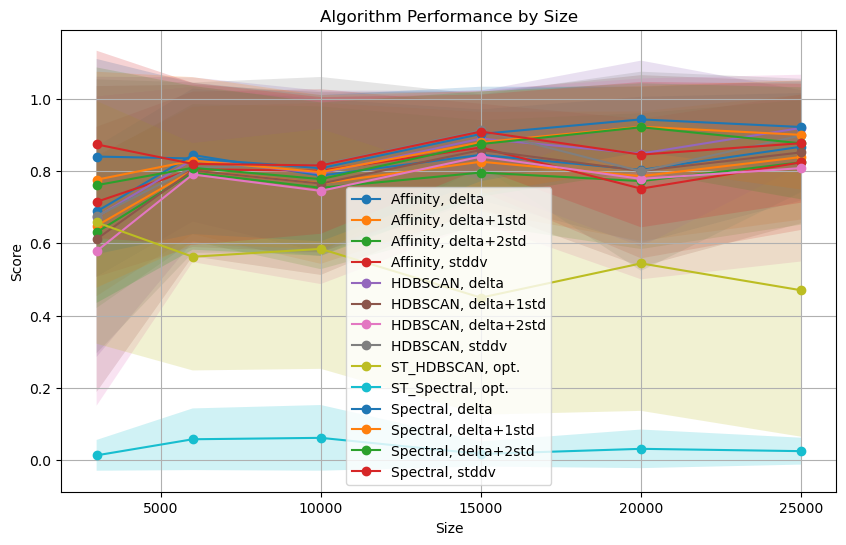

In [126]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "size"])["score"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

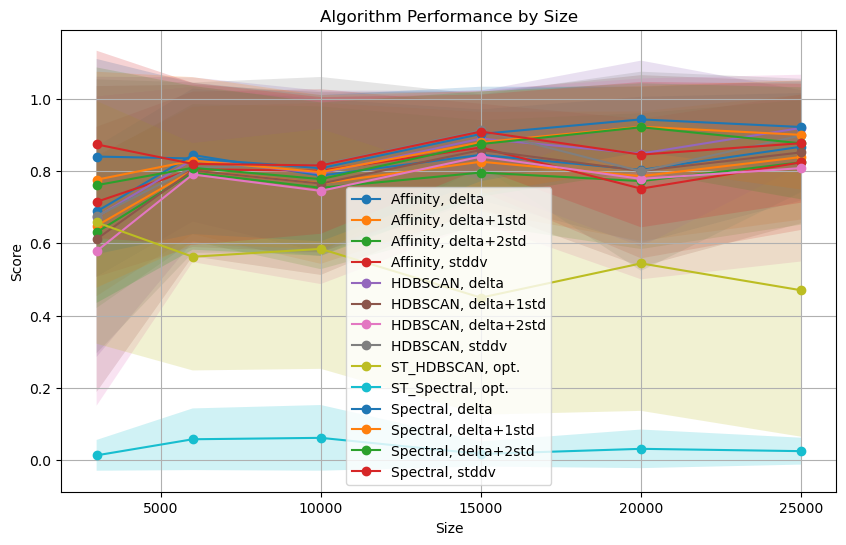

In [127]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "size"])["score"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

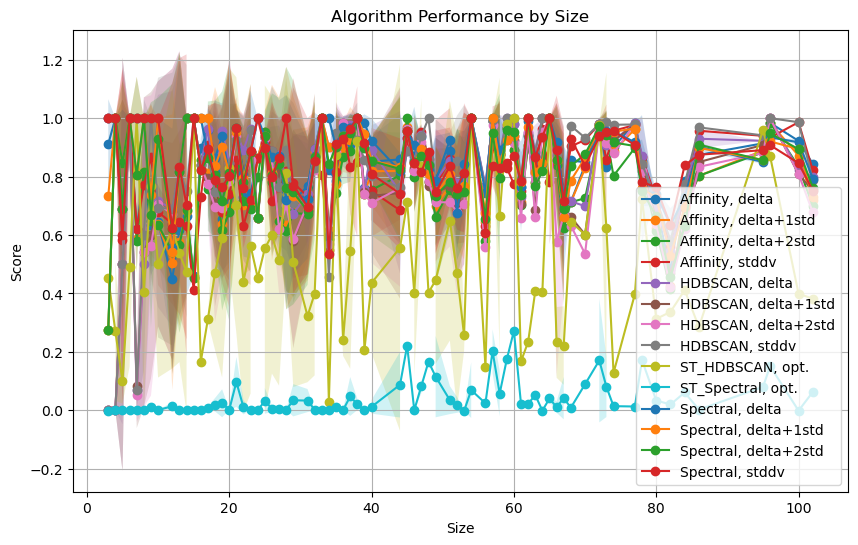

In [129]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "nr_particles"])["score"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["nr_particles"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["nr_particles"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

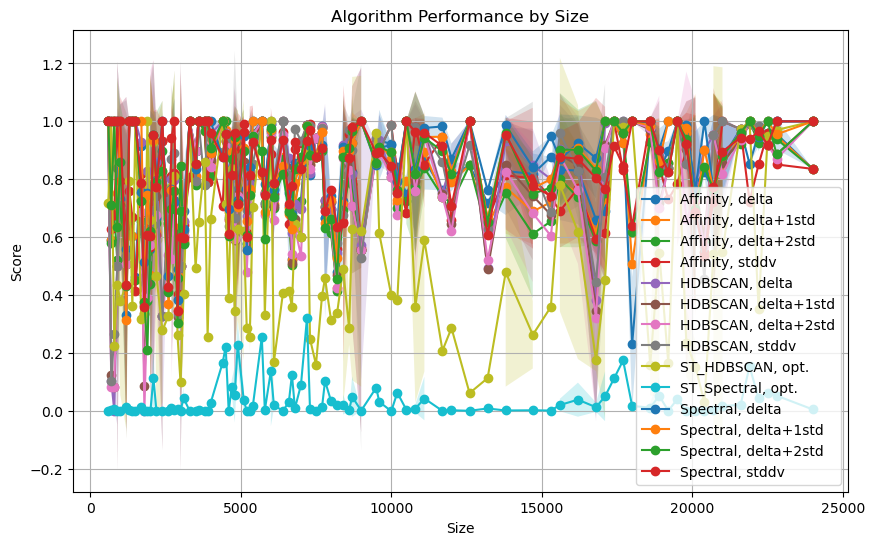

In [130]:
# Group by algorithm and size, calculating mean and std deviation
x_axis_interest = "nr_entries"

grouped = score_df.groupby(["algorithm", x_axis_interest])["score"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset[x_axis_interest], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset[x_axis_interest], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

In [131]:
nr_thresholds = [0, 800, 3000, 6000, 10000, 15000, 20000, 25000, 35000, 50000, 
                 80000, 100000, 130000, 150000, 180000, 200000, 230000, float("inf")]
bin_edges  = nr_thresholds[:-1]

# Assign each entry to the corresponding bin
#score_df["nr_entries_binned"] = pd.cut(score_df["nr_entries"], bins=bin_edges, labels=nr_thresholds, include_lowest=True)

# Convert to integer
#score_df["nr_entries_binned"] = score_df["nr_entries_binned"].astype(int)

# Apply binning with the lower bound labels
score_df["nr_entries_binned"] = pd.cut(score_df["nr_entries"], bins=nr_thresholds, labels=bin_edges, include_lowest=True, right=False)

# Convert to integer
score_df["nr_entries_binned"] = score_df["nr_entries_binned"].astype(int)



# Apply binning with the lower bound labels
score_df["nr_entries_original_binned"] = pd.cut(score_df["nr_entries_original"], bins=nr_thresholds, labels=bin_edges, include_lowest=True, right=False)

# Convert to integer
score_df["nr_entries_original_binned"] = score_df["nr_entries_original_binned"].astype(int)


In [132]:
score_df

,score,algorithm,file,runtime,params_dict,size,nr_entries,nr_entries_original,nr_particles,nr_timesteps,nr_clusters,nr_entries_binned,nr_entries_original_binned
0,0.604443,"Spectral, delta",reynolds_100_57.csv,0.011032,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800
1,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.011897,{},3000,1200,1600,12,100,4,800,800
2,0.732360,"Affinity, delta",reynolds_100_57.csv,0.011365,{},3000,1200,1600,12,100,4,800,800
3,0.604443,"Spectral, delta",reynolds_100_57.csv,0.009429,{'cluster_count': 4},3000,1200,1600,12,100,4,800,800
4,0.915000,"HDBSCAN, delta",reynolds_100_57.csv,0.008231,{},3000,1200,1600,12,100,4,800,800
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3555,1.000000,"Spectral, stddv",reynolds_300_24.csv,0.033278,{'cluster_count': 8},25000,18600,23400,62,300,8,15000,20000
3556,1.000000,"HDBSCAN, stddv",reynolds_300_24.csv,0.032734,{},25000,18600,23400,62,300,8,15000,20000
3557,1.000000,"Affinity, stddv",reynolds_300_24.csv,0.032274,{},25000,18600,23400,62,300,8,15000,20000
3558,0.234135,"ST_HDBSCAN, opt.",reynolds_300_24.csv,7.727665,"{'n_clusters': 8, 'threshold': 0.3, 'eps2': 5}",25000,18600,23400,62,300,8,15000,20000


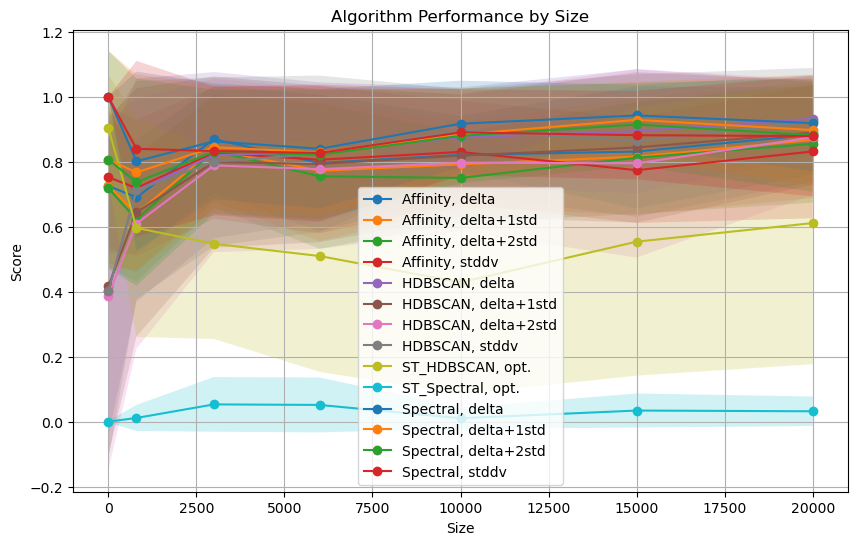

In [133]:
# Group by algorithm and size, calculating mean and std deviation
x_axis_interest = "nr_entries_binned"

grouped = score_df.groupby(["algorithm", x_axis_interest])["score"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset[x_axis_interest], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset[x_axis_interest], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

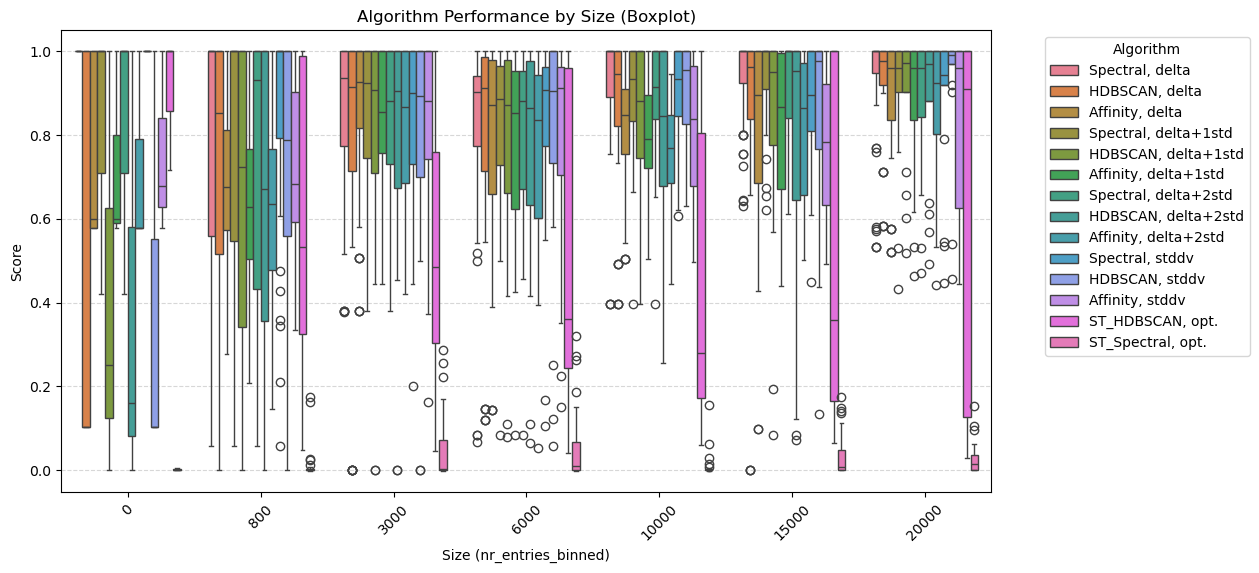

In [134]:
import matplotlib.pyplot as plt
import seaborn as sns

x_axis_interest = "nr_entries_binned"

# Set figure size
plt.figure(figsize=(12, 6))

# Create boxplot
sns.boxplot(data=score_df, x=x_axis_interest, y="score", hue="algorithm")

# Formatting
plt.xlabel("Size (nr_entries_binned)")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size (Boxplot)")
plt.legend(title="Algorithm", bbox_to_anchor=(1.05, 1), loc="upper left")
plt.xticks(rotation=45)  # Rotate x-axis labels if needed
plt.grid(True, axis="y", linestyle="--", alpha=0.5)  # Grid only for Y-axis

# Show plot
plt.show()


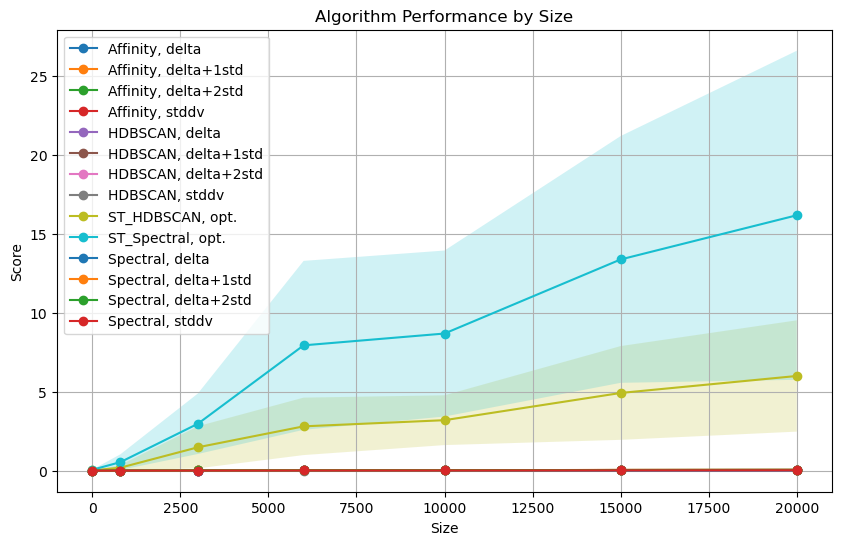

In [135]:
# Group by algorithm and size, calculating mean and std deviation
x_axis_interest = "nr_entries_binned"

grouped = score_df.groupby(["algorithm", x_axis_interest])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset[x_axis_interest], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset[x_axis_interest], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

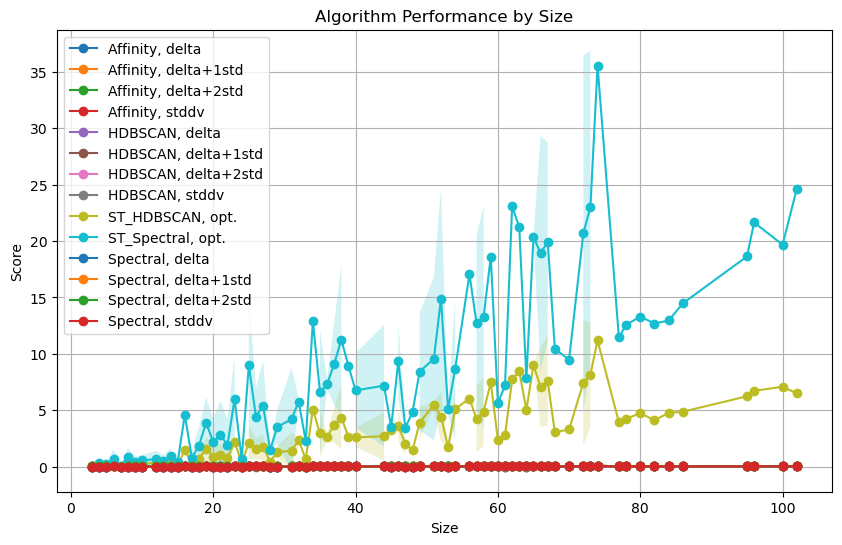

In [136]:
# Group by algorithm and size, calculating mean and std deviation
x_axis_interest = "nr_particles"

grouped = score_df.groupby(["algorithm", x_axis_interest])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset[x_axis_interest], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset[x_axis_interest], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

In [137]:
score_df.columns

Index(['score', 'algorithm', 'file', 'runtime', 'params_dict', 'size',
       'nr_entries', 'nr_entries_original', 'nr_particles', 'nr_timesteps',
       'nr_clusters', 'nr_entries_binned', 'nr_entries_original_binned'],
      dtype='object')

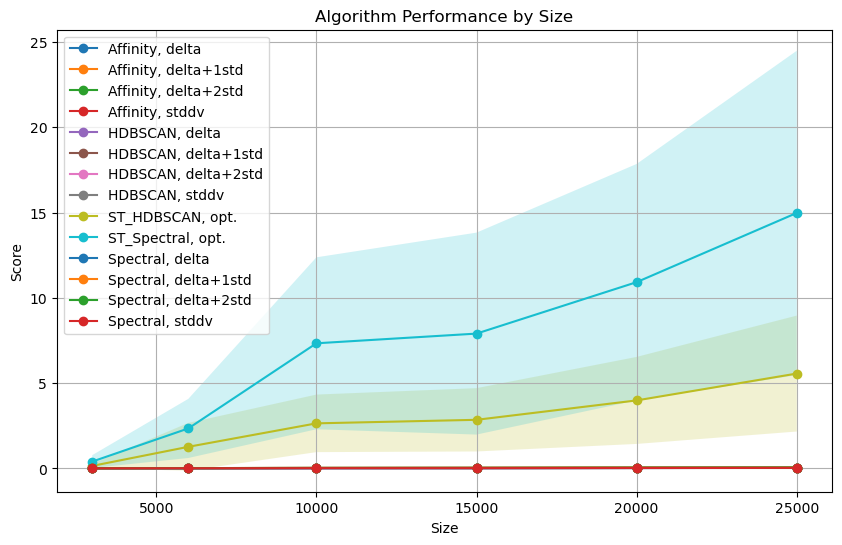

In [138]:
# Group by algorithm and size, calculating mean and std deviation
grouped = score_df.groupby(["algorithm", "size"])["runtime"].agg(["mean", "std"]).reset_index()

# Plot
plt.figure(figsize=(10, 6))

# Loop over each algorithm and plot the mean score with std deviation
for algo in grouped["algorithm"].unique():
    subset = grouped[grouped["algorithm"] == algo]
    plt.plot(subset["size"], subset["mean"], marker="o", label=algo)
    plt.fill_between(subset["size"], subset["mean"] - subset["std"], subset["mean"] + subset["std"], alpha=0.2)

plt.xlabel("Size")
plt.ylabel("Score")
plt.title("Algorithm Performance by Size")
plt.legend()
plt.grid(True)
plt.show()

In [139]:

final_filename = df_filename_csv + ".csv"
from os.path import exists
counter = 1
while exists(final_filename):
    final_filename = df_filename_csv + "_" + str(counter) + ".csv"
    counter = counter + 1
score_df.to_csv(final_filename)

In [143]:
df_filename_csv

'scores_df_n30_allNEW'